<a href="https://colab.research.google.com/github/jc020230/test4class/blob/main/week5_i.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

This is a companion notebook for the book [Deep Learning with Python, Second Edition](https://www.manning.com/books/deep-learning-with-python-second-edition?a_aid=keras&a_bid=76564dff). For readability, it only contains runnable code blocks and section titles, and omits everything else in the book: text paragraphs, figures, and pseudocode.

**If you want to be able to follow what's going on, I recommend reading the notebook side by side with your copy of the book.**

This notebook was generated for TensorFlow 2.6.

# Fundamentals of machine learning

## Generalization: The goal of machine learning

### Underfitting and overfitting

#### Noisy training data

#### Ambiguous features

#### Rare features and spurious correlations

**Adding white-noise channels or all-zeros channels to MNIST**

In [ ]:
from tensorflow.keras.datasets import mnist
import numpy as np

(train_images, train_labels), _ = mnist.load_data()
train_images = train_images.reshape((60000, 28 * 28))
train_images = train_images.astype("float32") / 255

train_images_with_noise_channels = np.concatenate(
    [train_images, np.random.random((len(train_images), 784))], axis=1)

train_images_with_zeros_channels = np.concatenate(
    [train_images, np.zeros((len(train_images), 784))], axis=1)

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [ ]:
np.zeros((len(train_images), 784)).shape

(60000, 784)

In [ ]:
train_images.shape

(60000, 784)

In [ ]:
train_images_with_noise_channels.shape

(60000, 1568)

In [ ]:
np.random.random((len(train_images), 784)).shape

(60000, 784)

**Training the same model on MNIST data with noise channels or all-zero channels**

In [ ]:
model = get_model()
history_original = model.fit(
    train_images_with_original_channels, train_labels,
    epochs=10,
    batch_size=128,
    validation_split=0.2)

In [ ]:
from tensorflow import keras
from tensorflow.keras import layers

def get_model():
    model = keras.Sequential([
        layers.Dense(512, activation="relu"),
        layers.Dense(10, activation="softmax")
    ])
    model.compile(optimizer="rmsprop",
                  loss="sparse_categorical_crossentropy",
                  metrics=["accuracy"])
    return model

model = get_model()
history_noise = model.fit(
    train_images_with_noise_channels, train_labels,
    epochs=10,
    batch_size=128,
    validation_split=0.2)

model = get_model()
history_zeros = model.fit(
    train_images_with_zeros_channels, train_labels,
    epochs=10,
    batch_size=128,
    validation_split=0.2)

Epoch 1/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.1042 - loss: 2.4920 - val_accuracy: 0.1104 - val_loss: 2.3021
Epoch 2/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.1091 - loss: 2.3020 - val_accuracy: 0.1101 - val_loss: 2.3013
Epoch 3/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.1129 - loss: 2.3019 - val_accuracy: 0.1034 - val_loss: 2.3022
Epoch 4/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.1131 - loss: 2.3020 - val_accuracy: 0.1082 - val_loss: 2.3052
Epoch 5/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.1087 - loss: 2.3028 - val_accuracy: 0.1074 - val_loss: 2.3078
Epoch 6/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.1128 - loss: 2.3015 - val_accuracy: 0.1007 - val_loss: 2.3074
Epoch 7/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.1169 - loss: 2.3003 - val_accuracy: 0.1069 - val_loss: 2.3033
Epoch 8/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.1192 - loss: 2.2977 - val_accuracy: 0.

**Plotting a validation accuracy comparison**

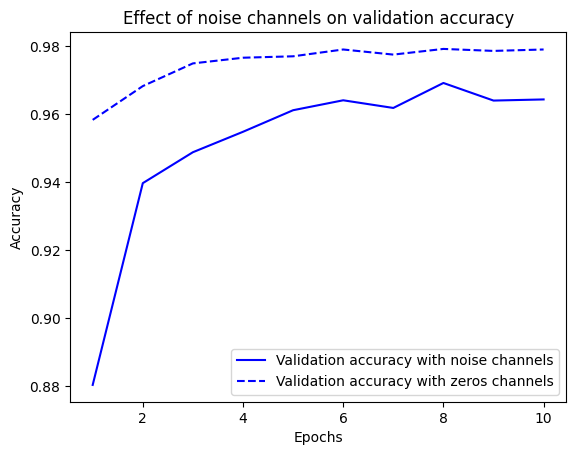

In [ ]:
import matplotlib.pyplot as plt
val_acc_noise = history_noise.history["val_accuracy"]
val_acc_zeros = history_zeros.history["val_accuracy"]
val_acc_ori = history_ori.history["val_accuracy"]
epochs = range(1, 11)
plt.plot(epochs, val_acc_noise, "b-",
         label="Validation accuracy with noise channels")
plt.plot(epochs, val_acc_zeros, "b--",
         label="Validation accuracy with zeros channels")
plt.plot(epochs, val_acc_ori, "r--",
         label="Validation accuracy with zeros channels")
plt.title("Effect of noise channels on validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()

### The nature of generalization in deep learning

**Fitting a MNIST model with randomly shuffled labels**

In [ ]:
(train_images, train_labels), _ = mnist.load_data()
train_images = train_images.reshape((60000, 28 * 28))
train_images = train_images.astype("float32") / 255

random_train_labels = train_labels[:]
np.random.shuffle(random_train_labels)

model = keras.Sequential([
    layers.Dense(512, activation="relu"),
    layers.Dense(10, activation="softmax")
])
model.compile(optimizer="rmsprop",
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])
model.fit(train_images, random_train_labels,
          epochs=100,
          batch_size=128,
          validation_split=0.2)

Epoch 1/100
375/375 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.1008 - loss: 2.3334 - val_accuracy: 0.0989 - val_loss: 2.3056
Epoch 2/100
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.1212 - loss: 2.2981 - val_accuracy: 0.1013 - val_loss: 2.3110
Epoch 3/100
375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.1297 - loss: 2.2902 - val_accuracy: 0.1028 - val_loss: 2.3168
Epoch 4/100
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.1401 - loss: 2.2765 - val_accuracy: 0.0980 - val_loss: 2.3216
Epoch 5/100
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.1553 - loss: 2.2619 - val_accuracy: 0.1005 - val_loss: 2.3332
Epoch 6/100
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.1693 - loss: 2.2404 - val_accuracy: 0.0953 - val_loss: 2.3478
Epoch 7/100
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.1819 - loss: 2.2187 - val_accuracy: 0.0993 - val_loss: 2.3612
Epoch 8/100
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.2020 - loss: 2.1883 - val_accu

#### The manifold hypothesis

#### Interpolation as a source of generalization

#### Why deep learning works

#### Training data is paramount

## Evaluating machine-learning models

### Training, validation, and test sets

#### Simple hold-out validation

#### K-fold validation

#### Iterated K-fold validation with shuffling

### Beating a common-sense baseline

### Things to keep in mind about model evaluation

## Improving model fit

### Tuning key gradient descent parameters

**Training a MNIST model with an incorrectly high learning rate**

In [ ]:
(train_images, train_labels), _ = mnist.load_data()
train_images = train_images.reshape((60000, 28 * 28))
train_images = train_images.astype("float32") / 255

model = keras.Sequential([
    layers.Dense(512, activation="relu"),
    layers.Dense(10, activation="softmax")
])
model.compile(optimizer=keras.optimizers.RMSprop(1.),
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])
model.fit(train_images, train_labels,
          epochs=10,
          batch_size=128,
          validation_split=0.2)

Epoch 1/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.4539 - loss: 3703.7493 - val_accuracy: 0.2539 - val_loss: 2.0498
Epoch 2/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.2247 - loss: 2.6367 - val_accuracy: 0.2313 - val_loss: 2.2749
Epoch 3/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.2066 - loss: 2.7648 - val_accuracy: 0.1583 - val_loss: 2.2334
Epoch 4/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.2067 - loss: 2.5002 - val_accuracy: 0.1859 - val_loss: 2.1690
Epoch 5/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.1829 - loss: 2.3455 - val_accuracy: 0.1605 - val_loss: 2.3717
Epoch 6/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.1714 - loss: 2.4097 - val_accuracy: 0.1589 - val_loss: 2.3049
Epoch 7/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.1696 - loss: 2.4403 - val_accuracy: 0.1864 - val_loss: 2.1866
Epoch 8/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.1836 - loss: 2.2963 - val_accuracy:

**The same model with a more appropriate learning rate**

In [ ]:
model = keras.Sequential([
    layers.Dense(512, activation="relu"),
    layers.Dense(10, activation="softmax")
])
model.compile(optimizer=keras.optimizers.RMSprop(1e-2),
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])
model.fit(train_images, train_labels,
          epochs=10,
          batch_size=128,
          validation_split=0.2)

Epoch 1/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.8370 - loss: 0.7523 - val_accuracy: 0.9628 - val_loss: 0.1365
Epoch 2/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9650 - loss: 0.1210 - val_accuracy: 0.9659 - val_loss: 0.1432
Epoch 3/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9757 - loss: 0.0900 - val_accuracy: 0.9659 - val_loss: 0.1552
Epoch 4/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9798 - loss: 0.0731 - val_accuracy: 0.9712 - val_loss: 0.1486
Epoch 5/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9834 - loss: 0.0617 - val_accuracy: 0.9716 - val_loss: 0.1616
Epoch 6/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9870 - loss: 0.0482 - val_accuracy: 0.9676 - val_loss: 0.2099
Epoch 7/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9874 - loss: 0.0495 - val_accuracy: 0.9715 - val_loss: 0.2083
Epoch 8/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9889 - loss: 0.0472 - val_accuracy: 0.

### Leveraging better architecture priors

### Increasing model capacity

**A simple logistic regression on MNIST**

In [ ]:
model = keras.Sequential([layers.Dense(10, activation="softmax")])
model.compile(optimizer="rmsprop",
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])
history_small_model = model.fit(
    train_images, train_labels,
    epochs=20,
    batch_size=128,
    validation_split=0.2)

Epoch 1/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.7314 - loss: 1.0652 - val_accuracy: 0.9040 - val_loss: 0.3628
Epoch 2/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8987 - loss: 0.3691 - val_accuracy: 0.9147 - val_loss: 0.3127
Epoch 3/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9102 - loss: 0.3216 - val_accuracy: 0.9150 - val_loss: 0.2985
Epoch 4/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9173 - loss: 0.2953 - val_accuracy: 0.9216 - val_loss: 0.2840
Epoch 5/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9151 - loss: 0.2987 - val_accuracy: 0.9237 - val_loss: 0.2787
Epoch 6/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9212 - loss: 0.2855 - val_accuracy: 0.9249 - val_loss: 0.2742
Epoch 7/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9214 - loss: 0.2806 - val_accuracy: 0.9257 - val_loss: 0.2718
Epoch 8/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9245 - loss: 0.2722 - val_accuracy: 0.

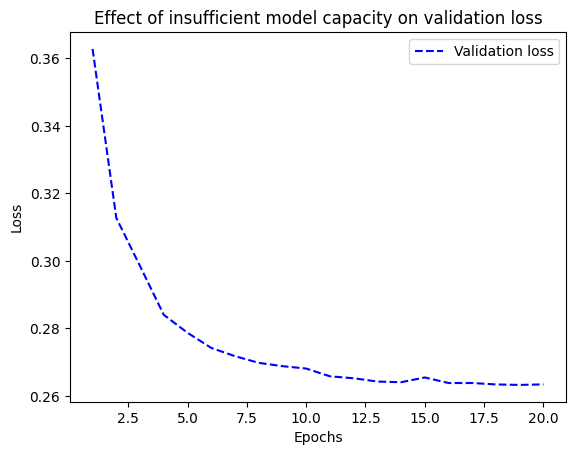

In [ ]:
import matplotlib.pyplot as plt
val_loss = history_small_model.history["val_loss"]
epochs = range(1, 21)
plt.plot(epochs, val_loss, "b--",
         label="Validation loss")
plt.title("Effect of insufficient model capacity on validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()

In [ ]:
model = keras.Sequential([
    layers.Dense(96, activation="relu"),
    layers.Dense(96, activation="relu"),
    layers.Dense(10, activation="softmax"),
])
model.compile(optimizer="rmsprop",
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])
history_large_model = model.fit(
    train_images, train_labels,
    epochs=20,
    batch_size=128,
    validation_split=0.2)

Epoch 1/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.8288 - loss: 0.6189 - val_accuracy: 0.9494 - val_loss: 0.1857
Epoch 2/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9487 - loss: 0.1816 - val_accuracy: 0.9603 - val_loss: 0.1363
Epoch 3/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9631 - loss: 0.1256 - val_accuracy: 0.9628 - val_loss: 0.1227
Epoch 4/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9729 - loss: 0.0931 - val_accuracy: 0.9688 - val_loss: 0.1103
Epoch 5/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9792 - loss: 0.0705 - val_accuracy: 0.9699 - val_loss: 0.1004
Epoch 6/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9820 - loss: 0.0595 - val_accuracy: 0.9715 - val_loss: 0.0999
Epoch 7/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9862 - loss: 0.0462 - val_accuracy: 0.9716 - val_loss: 0.1026
Epoch 8/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9879 - loss: 0.0389 - val_accuracy: 0.

## Improving generalization

### Dataset curation

### Feature engineering

### Using early stopping

### Regularizing your model

#### Reducing the network's size

**Original model**

In [ ]:
from tensorflow.keras.datasets import imdb
(train_data, train_labels), _ = imdb.load_data(num_words=10000)

def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.
    return results
train_data = vectorize_sequences(train_data)

model = keras.Sequential([
    layers.Dense(16, activation="relu"),
    layers.Dense(16, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])
model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])
history_original = model.fit(train_data, train_labels,
                             epochs=20, batch_size=512, validation_split=0.4)

17464789/17464789 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Epoch 1/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 5s 126ms/step - accuracy: 0.7064 - loss: 0.5969 - val_accuracy: 0.8669 - val_loss: 0.3915
Epoch 2/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - accuracy: 0.8983 - loss: 0.3329 - val_accuracy: 0.8794 - val_loss: 0.3174
Epoch 3/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - accuracy: 0.9256 - loss: 0.2416 - val_accuracy: 0.8872 - val_loss: 0.2877
Epoch 4/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - accuracy: 0.9400 - loss: 0.1906 - val_accuracy: 0.8907 - val_loss: 0.2744
Epoch 5/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - accuracy: 0.9508 - loss: 0.1590 - val_accuracy: 0.8706 - val_loss: 0.3217
Epoch 6/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - accuracy: 0.9558 - loss: 0.1392 - val_accuracy: 0.8878 - val_loss: 0.2869
Epoch 7/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - accuracy: 0.9676 - loss: 0.1139 - val_accuracy: 0.8815 - val_loss: 0.3104
Epoch 8/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - accura

**Version of the model with lower capacity**

In [ ]:
model = keras.Sequential([
    layers.Dense(4, activation="relu"),
    layers.Dense(4, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])
model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])
history_smaller_model = model.fit(
    train_data, train_labels,
    epochs=20, batch_size=512, validation_split=0.4)

Epoch 1/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 5s 87ms/step - accuracy: 0.5874 - loss: 0.6496 - val_accuracy: 0.7192 - val_loss: 0.5577
Epoch 2/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - accuracy: 0.7775 - loss: 0.5333 - val_accuracy: 0.8018 - val_loss: 0.5124
Epoch 3/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - accuracy: 0.8483 - loss: 0.4811 - val_accuracy: 0.7997 - val_loss: 0.4944
Epoch 4/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - accuracy: 0.8807 - loss: 0.4432 - val_accuracy: 0.8459 - val_loss: 0.4708
Epoch 5/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - accuracy: 0.9108 - loss: 0.4156 - val_accuracy: 0.8815 - val_loss: 0.4561
Epoch 6/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - accuracy: 0.9298 - loss: 0.3952 - val_accuracy: 0.8703 - val_loss: 0.4488
Epoch 7/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - accuracy: 0.9421 - loss: 0.3761 - val_accuracy: 0.8489 - val_loss: 0.4608
Epoch 8/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - accuracy: 0.9476 - loss: 0.3610 - val_accuracy: 0.8849 - v

**Version of the model with higher capacity**

In [ ]:
model = keras.Sequential([
    layers.Dense(512, activation="relu"),
    layers.Dense(512, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])
model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])
history_larger_model = model.fit(
    train_data, train_labels,
    epochs=20, batch_size=512, validation_split=0.4)

Epoch 1/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 5s 96ms/step - accuracy: 0.6384 - loss: 0.6561 - val_accuracy: 0.7837 - val_loss: 0.4500
Epoch 2/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - accuracy: 0.8636 - loss: 0.3374 - val_accuracy: 0.8875 - val_loss: 0.2804
Epoch 3/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - accuracy: 0.9042 - loss: 0.2459 - val_accuracy: 0.8167 - val_loss: 0.4526
Epoch 4/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - accuracy: 0.9196 - loss: 0.2067 - val_accuracy: 0.7898 - val_loss: 0.5302
Epoch 5/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - accuracy: 0.9405 - loss: 0.1582 - val_accuracy: 0.8706 - val_loss: 0.3209
Epoch 6/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - accuracy: 0.9704 - loss: 0.0933 - val_accuracy: 0.8872 - val_loss: 0.3160
Epoch 7/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 40ms/step - accuracy: 0.9770 - loss: 0.0756 - val_accuracy: 0.8857 - val_loss: 0.3430
Epoch 8/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step - accuracy: 0.9829 - loss: 0.0594 - val_accuracy: 0.8838 - v

#### Adding weight regularization

**Adding L2 weight regularization to the model**

In [ ]:
from tensorflow.keras import regularizers
model = keras.Sequential([
    layers.Dense(16,
                 kernel_regularizer=regularizers.l2(0.002),
                 activation="relu"),
    layers.Dense(16,
                 kernel_regularizer=regularizers.l2(0.002),
                 activation="relu"),
    layers.Dense(1, activation="sigmoid")
])
model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])
history_l2_reg = model.fit(
    train_data, train_labels,
    epochs=20, batch_size=512, validation_split=0.4)

Epoch 1/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 5s 112ms/step - accuracy: 0.6737 - loss: 0.7070 - val_accuracy: 0.8489 - val_loss: 0.5104
Epoch 2/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - accuracy: 0.8860 - loss: 0.4578 - val_accuracy: 0.8763 - val_loss: 0.4169
Epoch 3/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 40ms/step - accuracy: 0.9089 - loss: 0.3629 - val_accuracy: 0.8544 - val_loss: 0.4260
Epoch 4/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - accuracy: 0.9185 - loss: 0.3182 - val_accuracy: 0.8798 - val_loss: 0.3770
Epoch 5/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - accuracy: 0.9292 - loss: 0.2875 - val_accuracy: 0.8865 - val_loss: 0.3586
Epoch 6/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - accuracy: 0.9373 - loss: 0.2716 - val_accuracy: 0.8649 - val_loss: 0.4051
Epoch 7/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - accuracy: 0.9396 - loss: 0.2607 - val_accuracy: 0.8768 - val_loss: 0.3811
Epoch 8/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - accuracy: 0.9436 - loss: 0.2506 - val_accuracy: 0.8838 - 

**Different weight regularizers available in Keras**

In [ ]:
from tensorflow.keras import regularizers
regularizers.l1(0.001)
regularizers.l1_l2(l1=0.001, l2=0.001)

#### Adding dropout

recommend


**Adding dropout to the IMDB model**

In [ ]:
model = keras.Sequential([
    layers.Dense(16, activation="relu"),
    layers.Dropout(0.5),
    layers.Dense(16, activation="relu"),
    layers.Dropout(0.5),
    layers.Dense(1, activation="sigmoid")
])
model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])
history_dropout = model.fit(
    train_data, train_labels,
    epochs=20, batch_size=512, validation_split=0.4)

Epoch 1/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 7s 114ms/step - accuracy: 0.5850 - loss: 0.6648 - val_accuracy: 0.8488 - val_loss: 0.5338
Epoch 2/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - accuracy: 0.7319 - loss: 0.5515 - val_accuracy: 0.8651 - val_loss: 0.4222
Epoch 3/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - accuracy: 0.7954 - loss: 0.4677 - val_accuracy: 0.8726 - val_loss: 0.3654
Epoch 4/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - accuracy: 0.8380 - loss: 0.4035 - val_accuracy: 0.8860 - val_loss: 0.3210
Epoch 5/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - accuracy: 0.8658 - loss: 0.3629 - val_accuracy: 0.8848 - val_loss: 0.2984
Epoch 6/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - accuracy: 0.8872 - loss: 0.3198 - val_accuracy: 0.8874 - val_loss: 0.2870
Epoch 7/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - accuracy: 0.9042 - loss: 0.2874 - val_accuracy: 0.8835 - val_loss: 0.2877
Epoch 8/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 40ms/step - accuracy: 0.9172 - loss: 0.2515 - val_accuracy: 0.8899 - 

## Summary